### Customer Segmentation


The project will involve:

1.	Data preprocessing

2.	Exploratory data analysis (EDA)

3.	Feature engineering

4.	Implementation of clustering algorithms
5.	Model evaluation and Result
6.	Data interpretation.


### Importing Libraries


In [30]:
from unittest.mock import inplace

import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.decomposition import PCA
import pickle


In [143]:
# Read the data from CSV file
#"C:\Users\mohamed sabry\Desktop\customer_segmentation_data.csv"+
df= pd.read_csv("C:/Users\mohamed sabry\Desktop\customer_segmentation_data.csv")

In [144]:
df.shape

(3834, 4)

In [145]:
df.describe()


,minutes_watched,CLV,region,channel
count,3725.000000,3834.000000,3834.000000,3834.000000
mean,1972.094497,118.383920,1.167188,3.870370
std,7401.693028,70.471274,0.923055,2.191972
min,0.000000,0.000000,0.000000,1.000000
25%,159.000000,62.580000,0.000000,2.000000
50%,512.000000,119.000000,2.000000,3.000000
75%,1521.000000,149.990000,2.000000,6.000000
max,288508.000000,626.400000,2.000000,8.000000


In [146]:
df.head(10)

,minutes_watched,CLV,region,channel
0,3197.0,205.42,2,4
1,63.0,149.99,0,1
2,605.0,119.00,2,2
3,20.0,240.00,2,4
4,245.0,184.36,1,4
5,259.0,418.63,0,3
6,5456.0,245.17,0,1
7,247.0,177.98,1,3
8,160.0,283.44,0,3
9,77.0,295.97,1,1


In [147]:
# Check for missing values
df.isnull().sum()

minutes_watched    109
CLV                  0
region               0
channel              0
dtype: int64

In [148]:
(109/3834)*100

2.842983828899322

In [149]:
# df['minutes_watched']= df['minutes_watched'].fillna(df['minutes_watched'].mode()[0])
df.dropna(inplace=True)

In [150]:
df.isnull().sum()


minutes_watched    0
CLV                0
region             0
channel            0
dtype: int64

In [151]:
df.dtypes

minutes_watched    float64
CLV                float64
region               int64
channel              int64
dtype: object

In [152]:
df['minutes_watched'].nunique()

1943

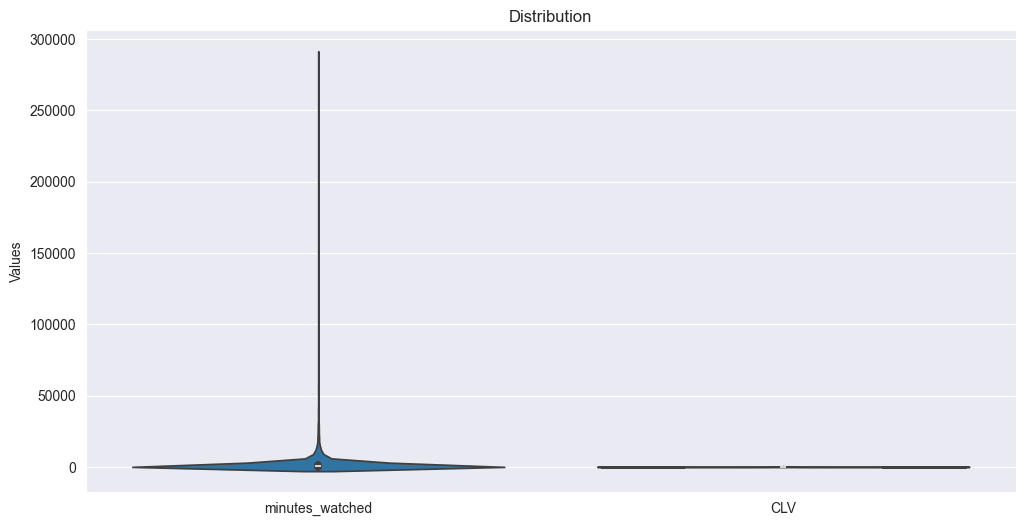

In [153]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['minutes_watched', 'CLV']])
plt.title("Distribution")
plt.ylabel("Values")
plt.show()


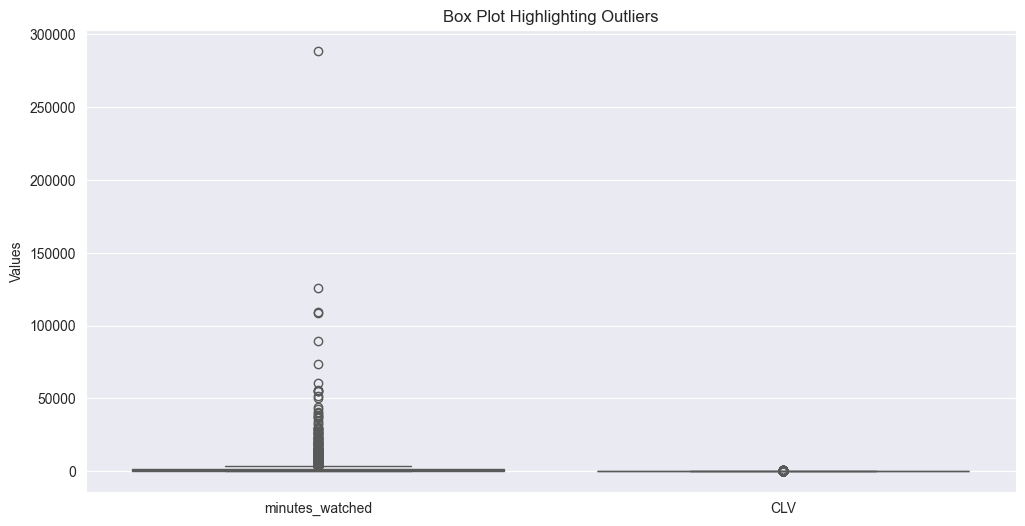

In [154]:
# Plot boxplots for numeric data to highlight outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['minutes_watched', 'CLV']], palette="Set2")
plt.title("Box Plot Highlighting Outliers")
plt.ylabel("Values")
plt.show()


In [155]:
#df_segmentation[['CLV', 'minutes_watched']] = df_segmentation[['CLV', 'minutes_watched']].apply(lambda x: np.log1p(x))


In [70]:
# Select numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numeric_columns:
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1  # Calculate IQR

    # Determine bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter data to remove outliers
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]


In [71]:
df.shape

(3240, 4)

In [156]:
# Define numerical columns to scale
numerical_columns = ['CLV', 'minutes_watched']

# Apply StandardScaler
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])


In [73]:
df.describe()

,minutes_watched,CLV,region,channel
count,3.240000e+03,3.240000e+03,3240.000000,3240.000000
mean,-8.772133e-18,-2.850943e-16,1.164815,3.869136
std,1.000154e+00,1.000154e+00,0.926437,2.183360
min,-8.897764e-01,-1.976684e+00,0.000000,1.000000
25%,-7.281121e-01,-8.477517e-01,0.000000,2.000000
50%,-3.973792e-01,1.700550e-01,2.000000,3.000000
75%,3.844092e-01,7.291090e-01,2.000000,6.000000
max,3.508478e+00,2.956305e+00,2.000000,8.000000


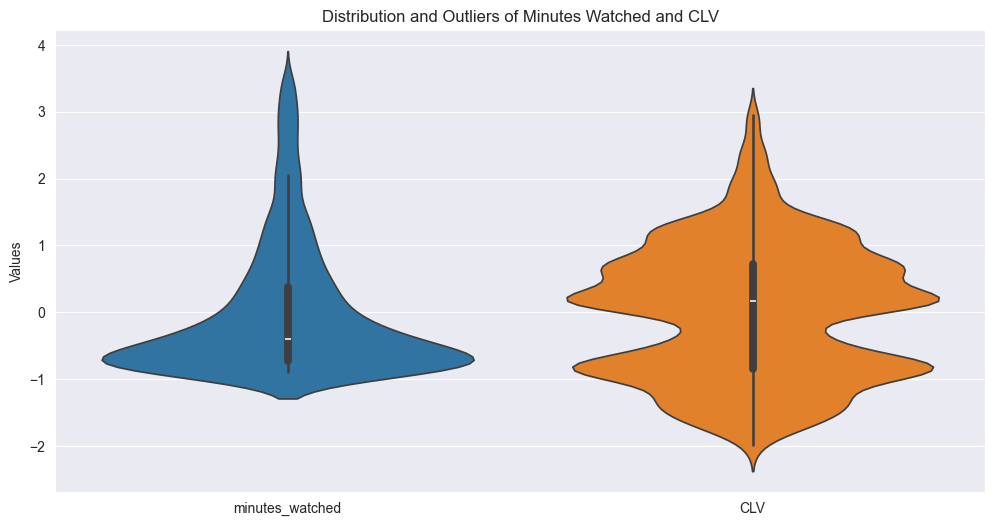

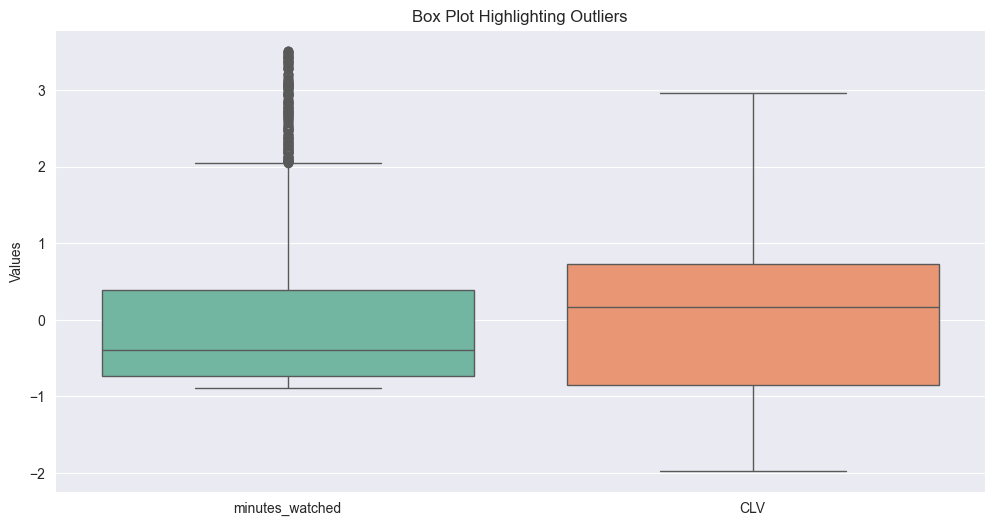

In [74]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=df[['minutes_watched', 'CLV']])
plt.title("Distribution and Outliers of Minutes Watched and CLV")
plt.ylabel("Values")
plt.show()
# Plot boxplots for numeric data to highlight outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['minutes_watched', 'CLV']], palette="Set2")
plt.title("Box Plot Highlighting Outliers")
plt.ylabel("Values")
plt.show()


## Feature_engineering

In [75]:
df.corr()


,minutes_watched,CLV,region,channel
minutes_watched,1.000000,-0.005919,0.120889,0.007853
CLV,-0.005919,1.000000,-0.325723,-0.012276
region,0.120889,-0.325723,1.000000,0.017993
channel,0.007853,-0.012276,0.017993,1.000000


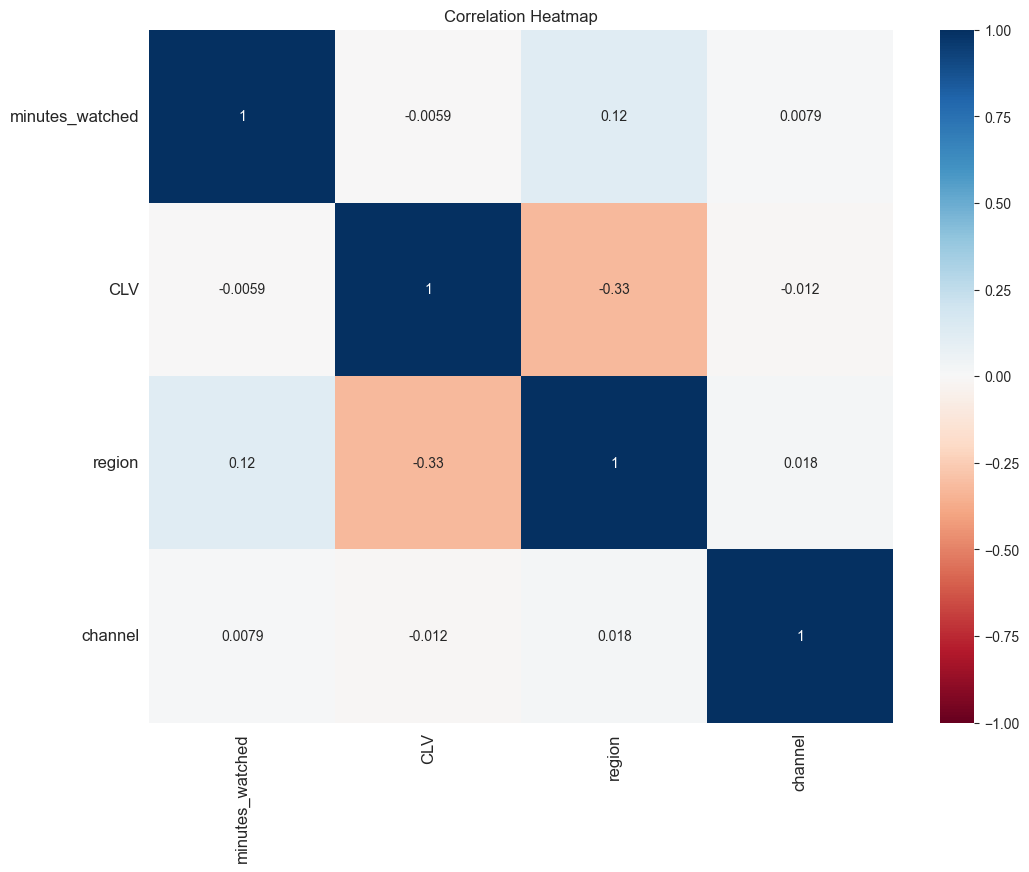

In [76]:
plt.figure(figsize = (12, 9))
s = sns.heatmap(df.corr(),
               annot = True,
               cmap = 'RdBu',
               vmin = -1,
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

## EDA

C:\Users\mohamed sabry\AppData\Local\Temp\ipykernel_18172\425954809.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='region', data=df, palette='Set2')


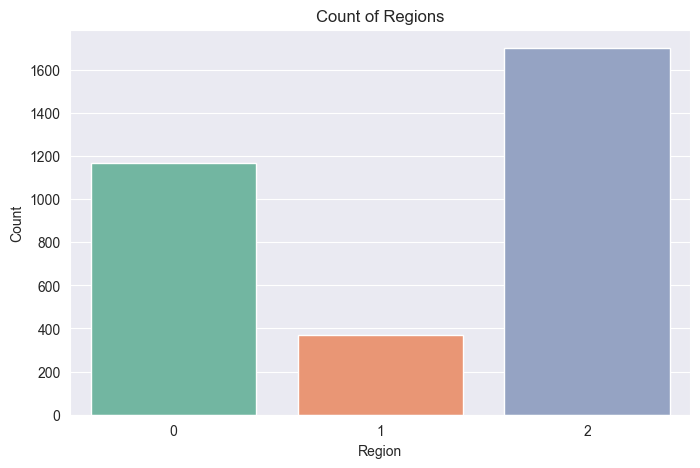

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(x='region', data=df, palette='Set2')
plt.title('Count of Regions')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

C:\Users\mohamed sabry\AppData\Local\Temp\ipykernel_18172\3913799057.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='channel', data=df, palette='Set3')


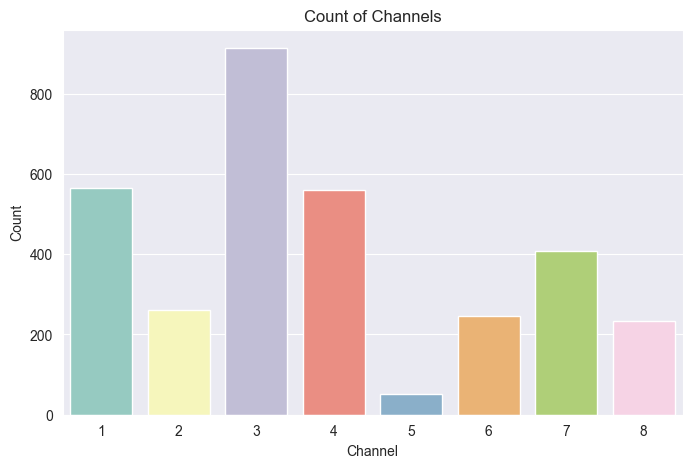

In [78]:
plt.figure(figsize=(8, 5))
sns.countplot(x='channel', data=df, palette='Set3')
plt.title('Count of Channels')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.show()

**𝐕𝐢𝐬𝐮𝐚𝐥𝐢𝐳𝐞 𝐑𝐚𝐰 data**

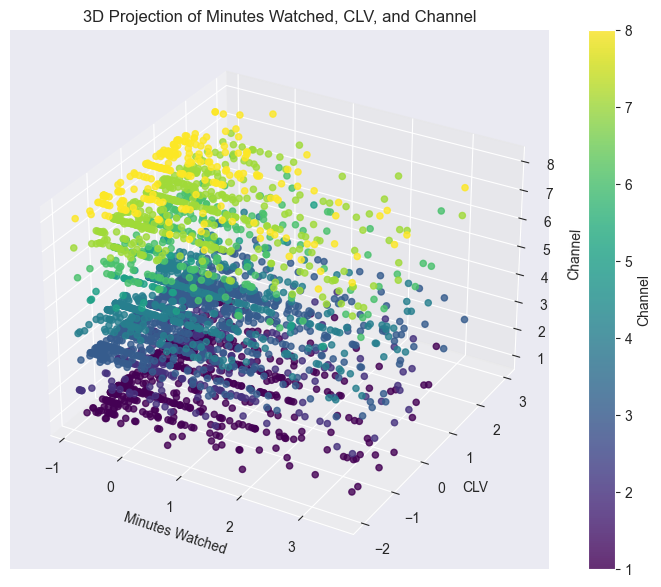

In [79]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
scatter = ax.scatter(
    df['minutes_watched'],df['CLV'], df['channel'],
c=df['channel'],
    cmap='viridis',s=20,
    alpha=0.8
)

# Set axis labels
ax.set_xlabel('Minutes Watched')
ax.set_ylabel('CLV')
ax.set_zlabel('Channel')
plt.title('3D Projection of Minutes Watched, CLV, and Channel')

# Add color bar
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Channel')

# Show the plot
plt.show()

## Implement Clustering Algorithms:

1.K-Means Clustering:

In [112]:
from sklearn.metrics import silhouette_score


In [113]:

wcss = []
sil_scores = []

# Iterate over the range of possible cluster counts (from 1 to 10)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df)  # Fit the model

    # Append WCSS (inertia)
    wcss.append(kmeans.inertia_)

    # Calculate and append silhouette score (only for k >= 2)
    if i > 1:
        sil_scores.append(silhouette_score(df[numerical_columns],kmeans.labels_))

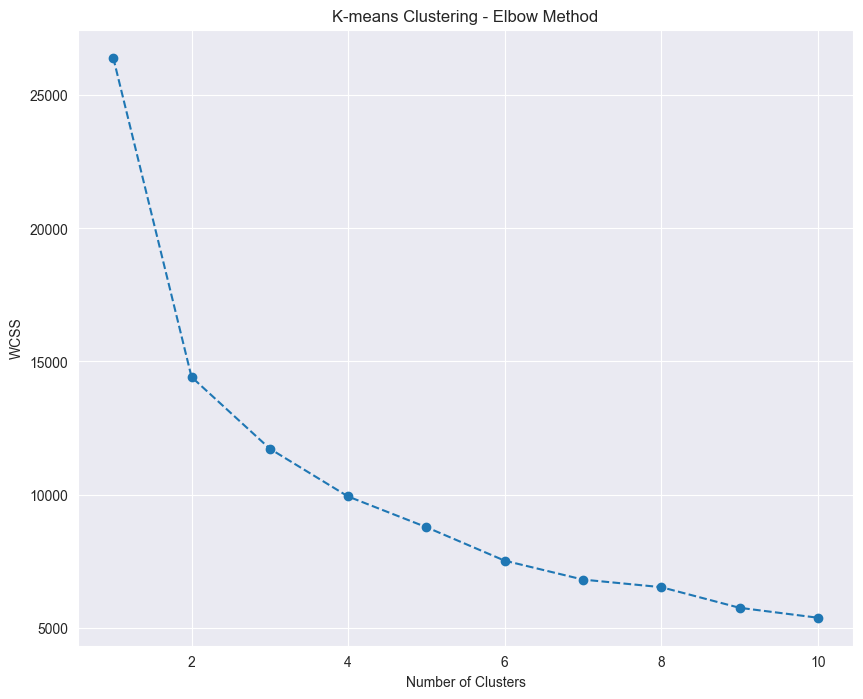

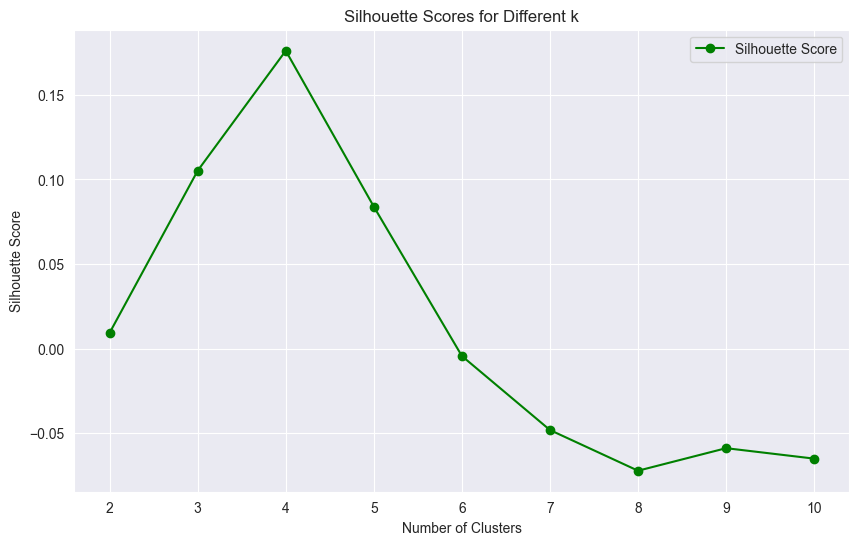

In [114]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering - Elbow Method')
plt.show()

# Plotting Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), sil_scores, marker='o', color='g', label='Silhouette Score')
plt.title('Silhouette Scores for Different k')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(range(2, 11))
plt.grid(True)
plt.legend()
plt.show()

In [115]:
#choose it based on silhouette_score
kmeans = KMeans(n_clusters = 4, random_state = 42)

In [116]:
kmeans.fit(df)


KMeans(n_clusters=4, random_state=42)

In [117]:
df

,minutes_watched,CLV,region,channel,Cluster_KMeans
0,3.055571,1.729056,2,4,0
1,-0.812029,0.729109,0,1,2
2,-0.143159,0.170055,2,2,2
3,-0.865095,2.352873,2,4,2
4,-0.587427,1.349138,1,4,2
...,...,...,...,...,...
3828,-0.852754,-1.083713,2,4,1
3829,-0.876202,-0.551538,0,3,1
3830,-0.855222,-0.551538,0,2,1
3831,-0.819434,-1.327250,2,2,1


## Hierarchical Clustering

In [159]:
hier_clust = linkage(df[numerical_columns], method = 'ward')

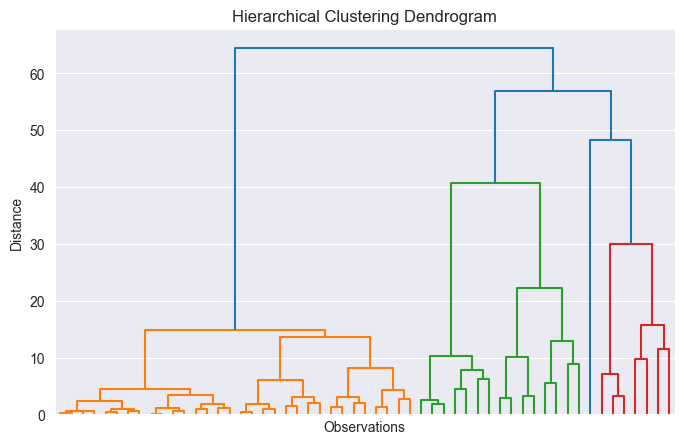

In [161]:
plt.figure(figsize = (8,5))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level',
           p = 5,
           show_leaf_counts = False,
           no_labels = True
          )
plt.show()

In [ ]:
# as explained 3 clusters

## Model Evaluation and Results

In [124]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_cust_segm_kmeans = df.copy()
df_cust_segm_kmeans['Customer Segment K-means'] = kmeans.labels_

In [125]:
# Calculate mean values for the clusters
df_cust_segm_analysis = df_cust_segm_kmeans.groupby(['Customer Segment K-means']).mean()
df_cust_segm_analysis

,minutes_watched,CLV,region,channel,Cluster_KMeans
Customer Segment K-means,,,,,
0,1.933615,0.106196,1.295265,2.635097,0.000000
1,-0.326549,-0.991223,1.600956,2.642772,1.000000
2,-0.385962,0.728238,0.778470,2.685053,1.990214
3,0.014103,-0.029359,1.189130,6.913043,1.319565


In [126]:
# Compute the size and proportions of the four clusters
df_cust_segm_analysis['N Obs'] = df[['CLV','minutes_watched']].groupby(['CLV']).count()
df_cust_segm_analysis['Prop Obs'] = df_cust_segm_analysis['N Obs'] / df_cust_segm_analysis['N Obs'].sum()

In [127]:
df_cust_segm_analysis


,minutes_watched,CLV,region,channel,Cluster_KMeans,N Obs,Prop Obs
Customer Segment K-means,,,,,,,
0,1.933615,0.106196,1.295265,2.635097,0.000000,NaN,NaN
1,-0.326549,-0.991223,1.600956,2.642772,1.000000,NaN,NaN
2,-0.385962,0.728238,0.778470,2.685053,1.990214,NaN,NaN
3,0.014103,-0.029359,1.189130,6.913043,1.319565,NaN,NaN


In [128]:
df_cust_segm_analysis.rename({0:'medium value',
                              1:'minimum value',
                              2:'Max',
                              3:'under medium value',})

,minutes_watched,CLV,region,channel,Cluster_KMeans,N Obs,Prop Obs
Customer Segment K-means,,,,,,,
medium value,1.933615,0.106196,1.295265,2.635097,0.000000,NaN,NaN
minimum value,-0.326549,-0.991223,1.600956,2.642772,1.000000,NaN,NaN
Max,-0.385962,0.728238,0.778470,2.685053,1.990214,NaN,NaN
under medium value,0.014103,-0.029359,1.189130,6.913043,1.319565,NaN,NaN


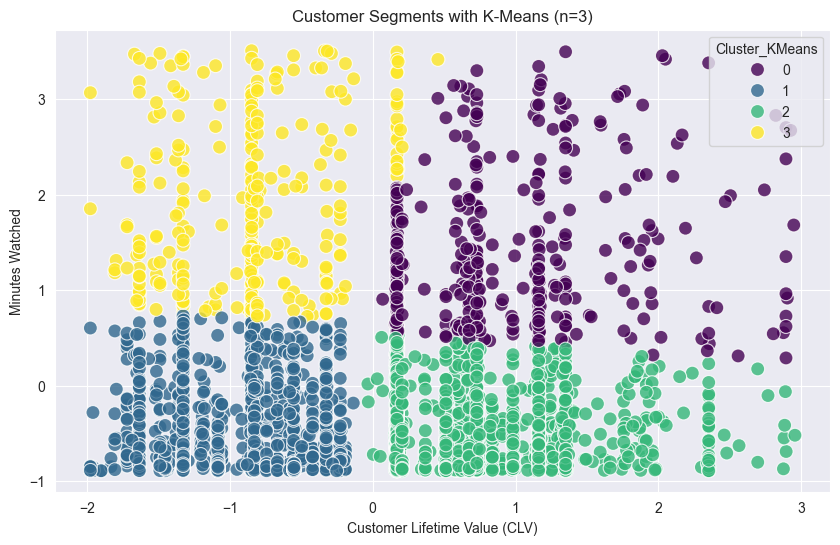

In [129]:
df['Cluster_KMeans'] = kmeans.fit_predict(df[numerical_columns])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['CLV'], y=df['minutes_watched'], hue=df['Cluster_KMeans'], palette='viridis', s=100, alpha=0.8)

# Plot title and labels
plt.title(f'Customer Segments with K-Means (n={3})')
plt.xlabel('Customer Lifetime Value (CLV)')
plt.ylabel('Minutes Watched')
plt.show()

In [98]:
[from sklearn.decomposition import PCA

In [99]:
pca = PCA()


In [100]:
# Fit PCA with our standardized data.
pca.fit(df)

PCA()

In [101]:
pca.explained_variance_ratio_

array([0.58478327, 0.19307438, 0.12972833, 0.07749372, 0.0149203 ])

Text(0, 0.5, 'Cumulative Explained Variance')

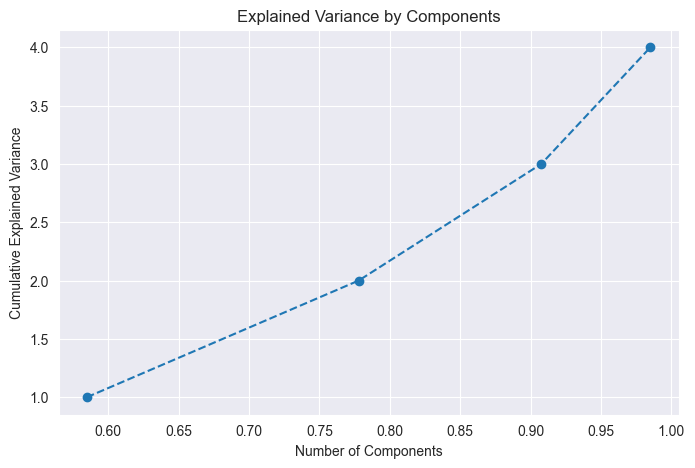

In [137]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep.
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (8,5))
# Get the number of components from pca.explained_variance_ratio_
num_components = len(pca.explained_variance_ratio_)
# Adjust the x-axis range to match the number of components
plt.plot(pca.explained_variance_ratio_.cumsum(),range(1, 5),  marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [103]:
pca = PCA(n_components = 4)


In [104]:
pca.fit(df)


PCA(n_components=4)

In [105]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features.
pca.components_

array([[ 0.00471323, -0.00781668,  0.00999119,  0.99990777,  0.00114378],
       [-0.51411821,  0.54043019, -0.44076992,  0.0104813 ,  0.49922911],
       [ 0.7269429 ,  0.58545269, -0.31810491,  0.00451869, -0.1660964 ],
       [-0.00210145,  0.51122559,  0.83918804, -0.00459102,  0.18543555]])

In [107]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = df.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3','Component 4'])
df_pca_comp

,minutes_watched,CLV,region,channel,Cluster_KMeans
Component 1,0.004713,-0.007817,0.009991,0.999908,0.001144
Component 2,-0.514118,0.540430,-0.440770,0.010481,0.499229
Component 3,0.726943,0.585453,-0.318105,0.004519,-0.166096
Component 4,-0.002101,0.511226,0.839188,-0.004591,0.185436


In [108]:
pca.transform(df)

array([[ 0.138569  , -1.66395161,  3.18824262,  1.33237734],
       [-2.88926176,  1.63260475,  0.08175697, -0.46442562],
       [-1.86184911,  0.11553815, -0.39100333,  0.92215111],
       ...,
       [-1.88069093,  0.47396291, -0.52878472, -1.30906085],
       [-1.85447637, -0.84519465, -1.59312135, -0.02732395],
       [-2.85445976, -0.84742795, -1.6093024 , -0.02269922]])

In [109]:
scores_pca = pca.transform(df)

([<matplotlib.axis.YTick at 0x19c937b7b10>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

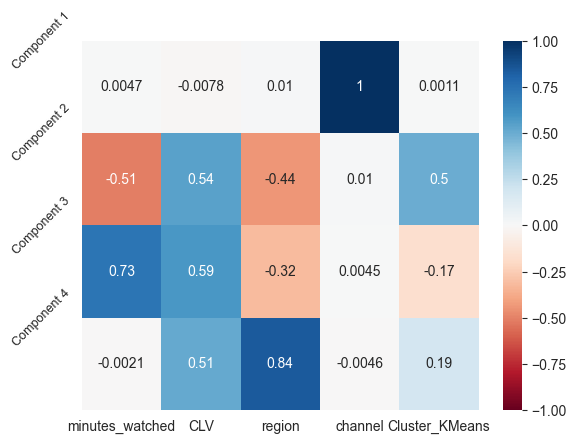

In [111]:
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu',
            annot = True)
plt.yticks([0, 1, 2,3], 
           ['Component 1', 'Component 2', 'Component 3','Component 4'],
           rotation = 45,
           fontsize = 9)